Se busca estudiar una distribución de tipos morfológicos y determinar si es consistente con una distribución uniforme.Se puede utilizar una prueba estadística que compare la distribución observada con una distribución uniforme teórica.

In [2]:
#importamos paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp

In [3]:
#Cargamos los datos descargados de CastJob, con los tipos morfologicos de galaxias (elipticas o espirales)
datos = pd.read_csv('Galaxias_color_2.csv')
datos

,specObjID,spiral,elliptical,petroMag_u,petroMag_r,petroMag_g,z
0,326558284548958208,1,0,19.10832,17.06106,17.73906,0.109850
1,326569004787329024,0,1,20.86176,17.51276,19.08985,0.248169
2,327682805351868416,1,0,19.61019,17.17898,18.05770,0.118198
3,327700122660005888,1,0,18.37072,15.98199,16.99851,0.047356
4,327705620218144768,1,0,19.24683,16.56079,17.41775,0.070256
...,...,...,...,...,...,...,...
252410,2446690238848854016,1,0,19.59210,17.53860,18.47113,0.173262
252411,2446690513726760960,1,0,20.18686,16.94943,17.95427,0.088267
252412,2446718826151176192,1,0,18.86731,17.60067,18.10199,0.041243
252413,3328214351491393536,0,1,19.12848,16.94564,17.70156,0.067408


Observamos que la tabla de datos tiene dos columnas clave que contienen los tipos morfologicos, spiral, elliptical.
Contamos cuantos tipos son espirales y cuantos tipos son morfologicos.
Luego, podemos realizar una prueba de $\chi²$ para comparar la distribución observada con la distribución esperada.

In [4]:
#contamos, de la lista de galaxias, cuantas son espirales y cuantas son elipticas.
# Contar cuántas galaxias son espirales y cuántas son elípticas
num_espirales = datos['spiral'].sum()
num_elipticas = datos['elliptical'].sum()

In [5]:
#Definimos el chi-cuadrado
def chi2(o,E):
    test=np.sum((o-E)**2/E)
    return(test)

In [6]:
#Creamos la lista con frecuencias observadas que contiene el numero de elipticas y el numero de espirales
frecuencias_observadas = np.array([num_espirales, num_elipticas])

In [7]:
# Asumimos una distribución uniforme: es decir, esperamos la misma cantidad de espirales y elípticas
total_galaxias = len(datos) #devuelve el número total de galaxias en el conjunto de datos.
frecuencia_esperada_uniforme = total_galaxias / 2  # Para una distribución uniforme, asumimos que los tipos morfológicos están igualmente distribuidos. Mitad son elipticas y mitad son espirales.
frecuencias_esperadas = np.array([frecuencia_esperada_uniforme, frecuencia_esperada_uniforme]) #Aquí estamos creando un array que contiene las frecuencias esperadas para cada tipo de galaxia.

In [8]:
frecuencias_observadas = np.array([len(datos[datos['elliptical'] == 1]), len(datos[datos['spiral'] == 1])])


In [9]:
#Con la funcion chi-cuadrado antes definida, calculamos el estadistico de prueba.
stat_chi2 = chi2(frecuencias_observadas, frecuencias_esperadas)
print('El valor de chi-cuadrado es:', stat_chi2)

El valor de chi-cuadrado es: 64944.48121149694


In [10]:
#Calculamos el valor-p utilizando la distribucion de chi-cuadrado
# Grados de libertad = número de categorías - 1
grados_de_libertad = len(frecuencias_observadas) - 1

valor_p = 1 - sp.chi2.cdf(stat_chi2, grados_de_libertad)
print('los grados de libertad son:',grados_de_libertad)
print('El valor-p es:',valor_p)



los grados de libertad son: 1
El valor-p es: 0.0


In [11]:
#Realizamos una prueba de rechazo para ver si nuestra distribucion es consistente con la distribucion uniforme o no
alpha = 0.05
if valor_p < alpha:
    print("Rechazamos la hipótesis nula: La distribución no sigue una distribución uniforme.")
else:
    print("No podemos rechazar la hipótesis nula: La distribución sigue la distribución uniforme.")


Rechazamos la hipótesis nula: La distribución no sigue una distribución uniforme.


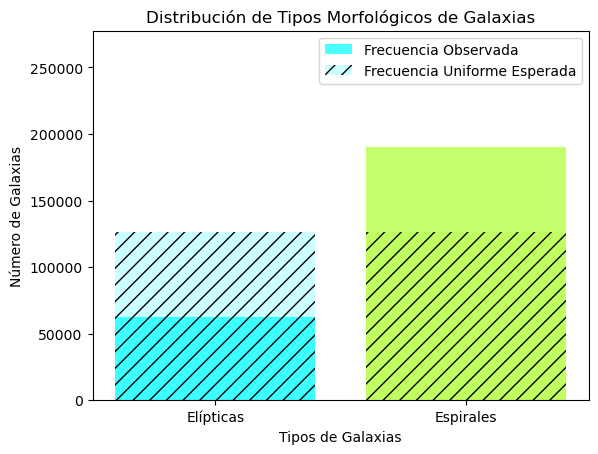

In [12]:
#Podemos graficar las frecuencias observadas y esperada, para visualizar las distribuciones.
x = ['Elípticas', 'Espirales']
y = [num_elipticas, num_espirales]

plt.bar(x, y, color=['cyan', 'greenyellow'], alpha=0.7, label='Frecuencia Observada')

# Gráfico de frecuencias esperadas
frecuencias_esperadas = [frecuencia_esperada_uniforme] * 2
plt.bar(x, frecuencias_esperadas, color=['cyan', 'greenyellow'], alpha=0.2, label='Frecuencia Uniforme Esperada', hatch='//')

plt.xlabel('Tipos de Galaxias')
plt.ylabel('Número de Galaxias')
plt.title('Distribución de Tipos Morfológicos de Galaxias')
plt.legend()
plt.ylim(0, total_galaxias * 1.1)  # Un poco más alto que el total para una mejor visualización
plt.savefig('Distribución de Tipos Morfológicos de Galaxias', dpi=300, bbox_inches='tight')
plt.show()